In [1]:
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import sys
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

2022-06-02 12:37:16.100865: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
In this environment you cannot import Basemap
In this environment you cannot import Basemap


### Loading 500 years

I am loading 500 years just in case I need to check something quickly

In [2]:
mylocal = '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/'
mylocal = '/local/gmiloshe/PLASIM/' 

X, Y, year_permutation, lat, lon = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),{'fields':['t2m'], 'lat_end': 24, 'dataset_years': 8000, 'year_list': range(500), 'year_permutation' : range(500), 'mylocal' : mylocal, 'roll_steps': 64})) 
#t2m = ln.load_data(**ut.set_values_recursive(ln.get_default_params(ln.load_data, recursive=True), {'fields' : ['t2m'], 'year_list' : 'range(500)'}))
import numpy as np
LON, LAT = np.meshgrid(lon,lat)

prepare_data:
  load_data:
    Opening field tas
    monotonize_years:
    monotonize_years: completed in 3.9 s
    select_years:
    select_years: completed in 0.7 s
    select_lonlat:
    select_lonlat: completed in 3.8 s
  load_data: completed in 26.0 s
  prepare_XY:
    make_XY:
      make_X:
      make_X: completed in 0.2 s
      assign_labels:
        compute_time_average:
        	compute_area_integral:
        	compute_area_integral: completed in 1.9 s
        compute_time_average: completed in 2.5 s
        threshold_new = None
      assign_labels: completed in 2.6 s
    make_XY: completed in 2.8 s
    roll_X:
    roll_X: completed in 0.2 s
    Mixing
    Mixing overriden by provided permutation
    Mixing completed in 0.2 s
    
    X.shape = (500, 77, 24, 128, 1), Y.shape = (500, 77)
    Flattened time: X.shape = (38500, 24, 128, 1), Y.shape = (38500,)
  prepare_XY: completed in 3.2 s
prepare_data: completed in 29.2 s


Let's make a sample plot of this

/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/cartopy_plots.py:134: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, label=colorbar_label, extend='both')


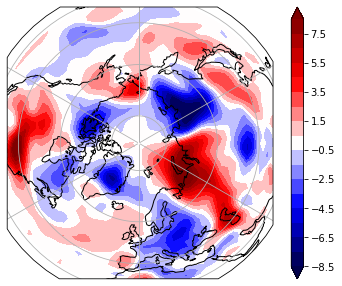

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeat
data_proj = ccrs.PlateCarree()
import cartopy_plots as cplt

t2mlevels = np.linspace(-8.5, 8.5, 18)  # Levels to be used when plotting
zg500levels = np.concatenate((np.arange(-20 * 10, 0, 20), np.arange(20, 10 * 21, 20)))
mrsolevels = np.linspace(-.1, .1, 18)

fig2 = plt.figure(figsize=(30, 5))
i = 0
time = 31032
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
m = fig2.add_subplot(spec2[0,i], projection=ccrs.Orthographic(central_latitude=90))
#ax.append(m)
m.set_extent([-180,180, 30, 90], crs=data_proj)
cplt.geo_contourf(m, LON, LAT, (X[time,:,:,0]+X[time+1,:,:,0]+X[time+2,:,:,0])/3, levels=t2mlevels, cmap="seismic", title=None, put_colorbar=True, draw_coastlines=True, draw_gridlines=True, draw_labels=False, greenwich=True)
#cplt.geo_contour(m, LON, LAT, X[12,:,:,0], levels=zg500levels, cmap1='PuRd', cmap2='summer', greenwich=True)

Loading 500 years of interpolated data

In [4]:
X2, Y2, year_permutation2, lat2, lon2 = ln.prepare_data(**ut.set_values_recursive(ln.get_default_params(ln.prepare_data, recursive=True),{'fields':['t2m_inter'], 'label_field':'t2m_inter', 'lat_end': 24, 'dataset_years': 8000, 'year_list': range(500), 'year_permutation' : range(500), 'mylocal' : mylocal, 'roll_steps': 64})) 
LON2, LAT2 = np.meshgrid(lon2,lat2)

prepare_data:
  load_data:
    Opening field tas
    monotonize_years:
    monotonize_years: completed in 3.8 s
    select_years:
    select_years: completed in 0.7 s
    select_lonlat:
    select_lonlat: completed in 3.6 s
  load_data: completed in 27.3 s
  prepare_XY:
    make_XY:
      make_X:
      make_X: completed in 0.2 s
      assign_labels:
        compute_time_average:
        	compute_area_integral:
        	compute_area_integral: completed in 1.3 s
        compute_time_average: completed in 2.0 s
        threshold_new = None
      assign_labels: completed in 2.0 s
    make_XY: completed in 2.2 s
    roll_X:
    roll_X: completed in 0.2 s
    Mixing
    Mixing overriden by provided permutation
    Mixing completed in 0.2 s
    
    X.shape = (500, 77, 24, 128, 1), Y.shape = (500, 77)
    Flattened time: X.shape = (38500, 24, 128, 1), Y.shape = (38500,)
  prepare_XY: completed in 2.7 s
prepare_data: completed in 30.0 s


/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/ERA/cartopy_plots.py:134: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(im, label=colorbar_label, extend='both')


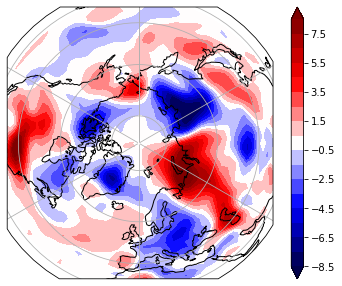

In [5]:
LON2, LAT2 = np.meshgrid(lon2,lat2)
fig2 = plt.figure(figsize=(30, 5))
i = 0
spec2 = gridspec.GridSpec(ncols=4, nrows=1, figure=fig2)
m = fig2.add_subplot(spec2[0,i], projection=ccrs.Orthographic(central_latitude=90))
#ax.append(m)
m.set_extent([-180,180, 30, 90], crs=data_proj)
cplt.geo_contourf(m, LON2, LAT2, X2[time,:,:,0], levels=t2mlevels, cmap="seismic", title=None, put_colorbar=True, draw_coastlines=True, draw_gridlines=True, draw_labels=False, greenwich=True)
#cplt.geo_contour(m, LON, LAT, X[12,:,:,0], levels=zg500levels, cmap1='PuRd', cmap2='summer', greenwich=True)

In [6]:
t2m_inter = ln.load_data(**ut.set_values_recursive(ln.get_default_params(ln.load_data, recursive=True), {'fields' : ['t2m_inter'], 'year_list' : 'range(500)'}))

load_data:
  Opening field tas
  monotonize_years:
  monotonize_years: completed in 3.8 s
  select_years:
  select_years: completed in 0.7 s
  select_lonlat:
  select_lonlat: completed in 3.2 s
load_data: completed in 25.1 s


In [7]:
t2m_inter['t2m_inter'].compute_area_integral()

compute_area_integral:
compute_area_integral: completed in 1.0 s


<xarray.DataArray (time: 74000)>
array([ 0.8536316 ,  0.5573931 ,  1.1592395 , ...,  1.4998499 ,
        0.26933053, -0.6873881 ], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-02 10:30:00 ... 0499-09-29 10:30:00

In [8]:
t2m_inter['t2m_inter'].area_integral

<xarray.DataArray (time: 74000)>
array([ 0.8536316 ,  0.5573931 ,  1.1592395 , ...,  1.4998499 ,
        0.26933053, -0.6873881 ], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-02 10:30:00 ... 0499-09-29 10:30:00

In [9]:
t2m = ln.load_data(**ut.set_values_recursive(ln.get_default_params(ln.load_data, recursive=True), {'fields' : ['t2m'], 'year_list' : 'range(500)'}))
t2m['t2m'].compute_area_integral()

load_data:
  Opening field tas
  monotonize_years:
  monotonize_years: completed in 4.0 s
  select_years:
  select_years: completed in 0.7 s
  select_lonlat:
  select_lonlat: completed in 3.4 s
load_data: completed in 26.3 s
compute_area_integral:
compute_area_integral: completed in 1.3 s


<xarray.DataArray (time: 75000)>
array([ 1.293383  ,  1.78588   , -0.51837283, ...,  0.0372176 ,
       -0.7539377 , -1.3454415 ], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0499-09-30 10:30:00

In [10]:
t2m['t2m'].area_integral[100:200]

<xarray.DataArray (time: 100)>
array([ 3.8974032 ,  1.0656626 , -0.5205009 ,  0.63912547,  2.6290932 ,
        4.402422  ,  5.1276617 ,  4.133701  ,  1.7689154 ,  1.379164  ,
        2.564797  ,  3.6244092 ,  3.3522656 ,  2.4818416 ,  1.9434352 ,
        2.3082268 ,  3.8230288 ,  5.02393   ,  5.43437   ,  5.9425    ,
        6.6775093 ,  5.6525774 ,  3.0297582 ,  2.653546  ,  2.3117514 ,
        2.3416479 ,  3.5699344 ,  1.0379536 , -3.6826487 , -4.3419237 ,
       -2.936573  , -1.1935387 ,  0.9932885 ,  2.3966746 ,  0.97804487,
       -0.14594284,  0.95212626,  2.8910227 ,  3.9139235 ,  3.0164342 ,
        1.8413727 ,  1.3319182 ,  1.1894234 ,  1.3987757 ,  1.7909957 ,
        2.0866034 , -0.39968896, -2.080224  , -0.3268901 ,  1.8642409 ,
        1.5435352 ,  3.1314437 ,  2.2721593 ,  1.5269499 , -2.3216867 ,
       -2.6976223 , -2.4900713 , -2.600669  ,  0.05954464,  3.08299   ,
        3.1062825 ,  1.5683123 ,  1.3162792 ,  1.2573533 , -0.2280559 ,
        1.5103381 ,  3.9793248 ,  5.4920883 ,  5.0070343 ,  3.867453  ,
        3.7460926 ,  4.340036  ,  5.130271  ,  6.289285  ,  7.1451244 ,
        7.4534836 ,  6.539198  ,  3.7338023 ,  1.6486971 ,  3.1726522 ,
        3.3307257 ,  1.6373991 ,  2.0312145 ,  3.4904447 ,  5.0992694 ,
        3.1222155 ,  1.0524791 , -0.2042262 , -0.3678407 , -0.75317436,
       -3.717927  , -6.980195  , -7.2545347 , -5.74858   , -2.9783692 ,
       -1.8257267 , -1.1934794 , -3.2225668 , -4.8111777 , -3.7044115 ],
      dtype=float32)
Coordinates:
  * time     (time) object 0000-08-11 10:30:00 ... 0001-06-20 10:30:00

In [11]:
time_start = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_start')
time_end = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_end')
day0 = t2m['t2m'].field.time.dt.dayofyear[0]
# series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end))[::-1]).rolling(time=15, center=False).construct("window_dim")#.mean().dropna('time')[::-1]
series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end)))
t_avg = lambda a: a[::-1].rolling(time=15, center=False).mean().dropna('time')[::-1]
running = series_int.groupby('time.year').apply(t_avg)

running
#A = t2m_inter['t2m_inter'].compute_time_average(day_start=day0+time_start, day_end=day0+time_end, T=14)


<xarray.DataArray (time: 38000)>
array([-0.33406633, -0.5020727 , -0.6147718 , ...,  0.6383307 ,
        0.5140542 ,  0.44347006], dtype=float32)
Coordinates:
  * time     (time) object 0000-06-01 10:30:00 ... 0499-08-16 10:30:00

In [72]:
import xarray as xr
def weight_average(a,**kwargs):
    kwargs['axis'] = kwargs['axis'][0] # Otherwise what is being fed into this function could be something of the sort (dim,), which is in conflict with weights
    return np.average(a,**kwargs)

da = xr.DataArray(np.arange(16).reshape(2, 8), dims=("a", "b"))
print(type(da))
rolling = da.rolling(b=3)
rolling.construct("window_dim")
rolling.reduce(weight_average, weights=np.array([1, 0, 1]))


<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray (a: 2, b: 8)>
array([[nan, nan,  1.,  2.,  3.,  4.,  5.,  6.],
       [nan, nan,  9., 10., 11., 12., 13., 14.]])
Dimensions without coordinates: a, b

In [94]:
rolling = (series_int.rolling(time=15, center=False)).construct("window_dim")
rolling


<xarray.DataArray (time: 45000, window_dim: 15)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,  2.3374112 ],
       [        nan,         nan,         nan, ...,         nan,
         2.3374112 ,  2.7866182 ],
       [        nan,         nan,         nan, ...,  2.3374112 ,
         2.7866182 ,  4.1825147 ],
       ...,
       [ 3.858688  ,  4.50171   ,  3.3211427 , ..., -2.5175164 ,
        -3.1544197 , -0.6539605 ],
       [ 4.50171   ,  3.3211427 ,  0.58458054, ..., -3.1544197 ,
        -0.6539605 ,  1.9945413 ],
       [ 3.3211427 ,  0.58458054, -1.154392  , ..., -0.6539605 ,
         1.9945413 ,  3.442948  ]], dtype=float32)
Coordinates:
  * time     (time) object 0000-06-01 10:30:00 ... 0499-08-30 10:30:00
Dimensions without coordinates: window_dim

In [92]:
rolling = series_int.rolling(time=15, center=False)
rolling.construct("window_dim")
rolling

DataArrayRolling [time->15]

In [96]:
type(series_int)

xarray.core.dataarray.DataArray

In [112]:
time_start = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_start')
time_end = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_end')
day0 = t2m['t2m'].field.time.dt.dayofyear[0]
# series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end))[::-1]).rolling(time=15, center=False).construct("window_dim")#.mean().dropna('time')[::-1]
series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end)))
print(f"{series_int = }")
rolling = series_int.rolling(time=5, center=False)
print(f"{rolling = }")
rolling.construct("window_dim")
print(f"{rolling = }")
rolling.reduce(weight_average, weights=np.array([1, 0, 1, 0 ,1])).dropna('time')

series_int = <xarray.DataArray (time: 45000)>
array([ 2.3374112,  2.7866182,  4.1825147, ..., -0.6539605,  1.9945413,
        3.442948 ], dtype=float32)
Coordinates:
  * time     (time) object 0000-06-01 10:30:00 ... 0499-08-30 10:30:00
rolling = DataArrayRolling [time->5]
rolling = DataArrayRolling [time->5]


<xarray.DataArray (time: 44996)>
array([ 1.61340169,  0.93161074, -0.55352255, ..., -1.06526391,
       -0.80228464,  0.0904904 ])
Coordinates:
  * time     (time) object 0000-06-05 10:30:00 ... 0499-08-30 10:30:00

In [122]:
time_start = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_start')
time_end = ut.extract_nested(ln.get_default_params(ln.make_XY), 'time_end')
day0 = t2m['t2m'].field.time.dt.dayofyear[0]
# series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end))[::-1]).rolling(time=15, center=False).construct("window_dim")#.mean().dropna('time')[::-1]
series_int = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end)))

def weight_average(*a,**kwargs):
    kwargs['axis'] = kwargs['axis'][0] # Otherwise what is being fed into this function could be something of the sort (dim,), which is in conflict with weights
    return np.average(*a,**kwargs)

def rolling_reduce_weighted(my_a:xr.DataArray, T, weights=None):
    #print(f"{my_a = }")
    rolling = my_a.rolling(time=T, center=False)
    #print(f"{rolling = }")
    rolling.construct("window_dim")
    #print(f"{rolling = }")
    return rolling.reduce(weight_average, weights=weights).dropna('time')

#rolling_reduce_weighted(series_int,5, weights=np.array([1, 0, 1, 0 ,1]))
series_int.groupby('time.year').apply(rolling_reduce_weighted, T=5, weights=np.array([1, 0, 1, 0 ,1]))


<xarray.DataArray (time: 43000)>
array([ 1.61340169,  0.93161074, -0.55352255, ..., -1.06526391,
       -0.80228464,  0.0904904 ])
Coordinates:
  * time     (time) object 0000-06-05 10:30:00 ... 0499-08-30 10:30:00

In [12]:
series  = t2m['t2m'].area_integral.sel(time=t2m['t2m'].area_integral.time.dt.dayofyear.isin(np.arange(day0+time_start, day0+time_end)))
sum = 0
for i in range(15):
    sum = sum + series[100+i]
sum/15

<xarray.DataArray ()>
array(-3.08367897)
Coordinates:
    time     object 0001-06-25 10:30:00

Now we can do analysis of some of the runs I have performed. They are all located in gmiloshe/
Below we will plot average score as a function of epoch. Here I am not using collective=True so the average score per epoch will be reported as a result. So in principle one could achieve better metrics

Text(0.5, 1.0, '100 yrs, zg500')

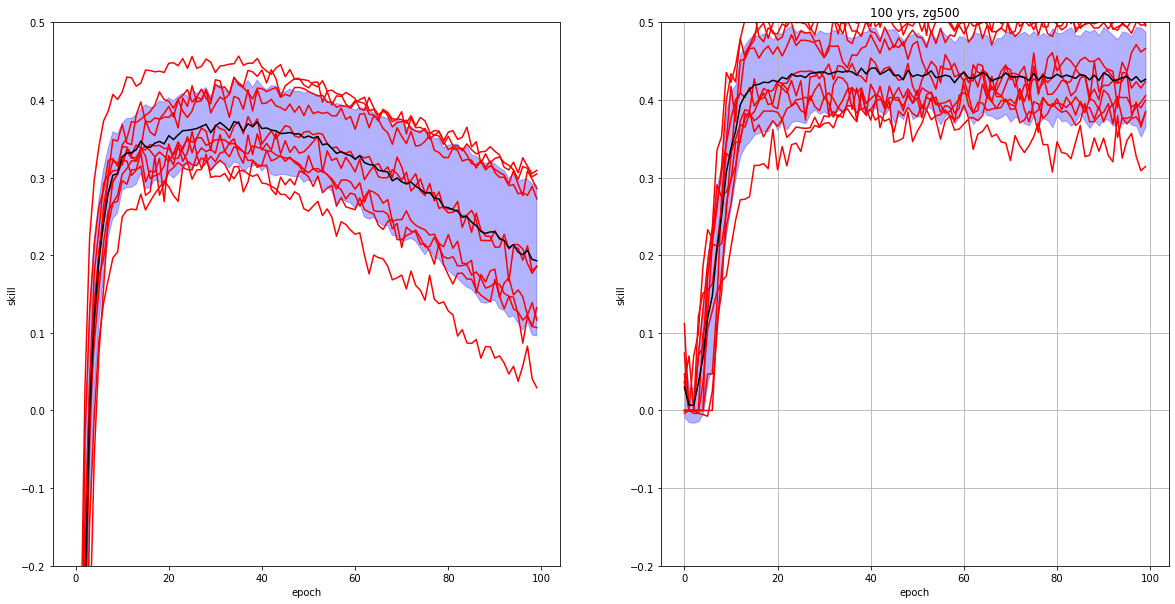

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
percent = 5
df = []
tau = 0
for i in range(10):
    df.append(pd.read_csv(f'models/u1yrs500/0/fold_{i}/history.csv')) #df.append(pd.read_csv(f'models/u1yrs100/0/fold_{i}/history.csv'))
df_concat = pd.concat(df, keys=range(10),names=['fold', None])
maxskill = -(percent/100.)*np.log(percent/100.)-(1-percent/100.)*np.log(1-percent/100.)
df_concat['val_CustomSkill'] = (maxskill - df_concat['val_CustomLoss'])/maxskill
fig = plt.figure(figsize=(20, 10))
spec= gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax = []
for i, label in enumerate(['val_CustomSkill', 'val_MCC']):
    ax.append(fig.add_subplot(spec[0,i]))
    dfmean = df_concat.groupby(level=1).mean().loc[:,label]
    dfstd = df_concat.groupby(level=1).std().loc[:,label]
    plt.fill_between(range(len(dfmean)), dfmean.values - dfstd.values, dfmean.values+ dfstd.values, color='blue',alpha=0.3)
    for i in range(10):
        plt.plot((df_concat.loc[i].loc[:,label]),color='red')
    plt.plot(dfmean, color='black')
    plt.ylim(-0.2,0.5)
    plt.xlabel('epoch')
    plt.ylabel('skill')
plt.grid(True)
plt.title('100 yrs, zg500')

In [92]:
runs_grouped_list[0]

{'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
 'runs': [{'name': 'F0--fields__(t2m_filtered,mrso_filtered)',
   'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
   'transfer_learning_from': None,
   'status': 'FAILED',
   'start_time': '2022-05-23 10:17:04',
   'end_time': '2022-05-23 10:17:12',
   'run_time': '7.4 s',
   'run_time_min': 0.12},
  {'name': '1--fields__(t2m_filtered,mrso_filtered)',
   'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
   'transfer_learning_from': None,
   'status': 'COMPLETED',
   'start_time': '2022-05-23 10:18:03',
   'score': 0.14307862073183059,
   'scores': {'fold_0': 0.1518024504184723,
    'fold_1': 0.14107179641723633,
    'fold_2': 0.1341412365436554,
    'fold_3': 0.13774441182613373,
    'fold_4': 0.1381550431251526,
    'fold_5': 0.1443907916545868,
    'fold_6': 0.13609084486961365,
    'fold_7': 0.15910604596138,
    'fold_8': 0.14758439362049103,
    'fold_9': 0.14069919288158417,
    'mean': 0.14307862073183059,
    '

In [64]:
runs = ut.json2dict(f"{folder}/runs.json")
runs_grouped_list = ln.make_groups(runs,config_dict_flat={'tau':0})
config = ut.json2dict(f"{folder}/config.json")
dg = []
taus = []
runs=runs_grouped_list[1]
runs['tau']

[0, -5, -10, -15, -20, -25, -30]

In [106]:
runs_grouped_list[0]

{'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
 'runs': [{'name': 'F0--fields__(t2m_filtered,mrso_filtered)',
   'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
   'transfer_learning_from': None,
   'status': 'FAILED',
   'start_time': '2022-05-23 10:17:04',
   'end_time': '2022-05-23 10:17:12',
   'run_time': '7.4 s',
   'run_time_min': 0.12},
  {'name': '1--fields__(t2m_filtered,mrso_filtered)',
   'args': {'fields': ['t2m_filtered', 'mrso_filtered']},
   'transfer_learning_from': None,
   'status': 'COMPLETED',
   'start_time': '2022-05-23 10:18:03',
   'score': 0.14307862073183059,
   'scores': {'fold_0': 0.1518024504184723,
    'fold_1': 0.14107179641723633,
    'fold_2': 0.1341412365436554,
    'fold_3': 0.13774441182613373,
    'fold_4': 0.1381550431251526,
    'fold_5': 0.1443907916545868,
    'fold_6': 0.13609084486961365,
    'fold_7': 0.15910604596138,
    'fold_8': 0.14758439362049103,
    'fold_9': 0.14069919288158417,
    'mean': 0.14307862073183059,
    '

It looks like we have enough epochs to claim we converged to optimal parameters. Let's put everyting together

F0--fields__(t2m_filtered,mrso_filtered)
1--fields__(t2m_filtered,mrso_filtered)
2--fields__(t2m_filtered,mrso_filtered)--tau__-1
3--fields__(t2m_filtered,mrso_filtered)--tau__-3
4--fields__(t2m_filtered,mrso_filtered)--tau__-5
5--fields__(t2m_filtered,mrso_filtered)--tau__-10
6--fields__(t2m_filtered,mrso_filtered)--tau__-15
7--fields__(zg500)
8--fields__(zg500)--tau__-1
9--fields__(zg500)--tau__-3
10--fields__(zg500)--tau__-5
11--fields__(zg500)--tau__-10
12--fields__(zg500)--tau__-15
13
14--tau__-1
15--tau__-3
16--tau__-5
17--tau__-10
18--tau__-15


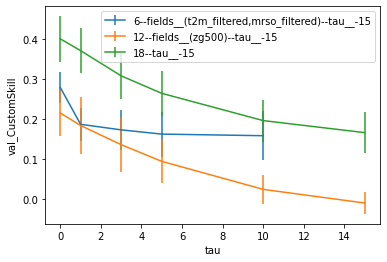

In [109]:
import os
import Learn2_new as ln
from pathlib import Path
import pandas as pd

ut = ln.ut
#folder = 'models/u1yrs500/'
folder = './xmodels/u1yrs500/'
runs = ut.json2dict(f"{folder}/runs.json")
runs_grouped_list = ln.make_groups(runs,config_dict_flat={'tau':0})
config = ut.json2dict(f"{folder}/config.json")


for runs in runs_grouped_list:
    dg = []
    taus = runs['tau']
    for value in runs['runs']:
        print(value['name'])
        if value['status'] != 'FAILED':
            data= pd.read_csv(f"{folder}/{value['name']}/fold_{0}/history.csv")
            #print(tau)
            df = []
            for i in range(10):
                df.append(pd.read_csv(f"{folder}/{value['name']}/fold_{i}/history.csv"))
            #print(f'{len(df) = }')
            dg.append(pd.concat(df, keys=range(10),names=['fold', None]))
    dg_frame = pd.concat(dg, keys=taus,names=['tau','fold', None])
    maxskill = -(percent/100.)*np.log(percent/100.)-(1-percent/100.)*np.log(1-percent/100.)
    dg_frame['val_CustomSkill'] = (maxskill - dg_frame['val_CustomLoss'])/maxskill
    dg_fold_mean = dg_frame.groupby(['tau','epoch']).mean()  # We need to compute fold-wise mean
    dg_idxmax = dg_fold_mean.loc[:,'val_CustomSkill'].groupby(['tau']).idxmax() # Now we compute the indices for which the val_CustomSkill is maximal because we need to apply them to standard deviation as well
    dg_foldmean_maxskill_mean = dg_frame.groupby(['tau','epoch']).mean().loc[dg_idxmax] #Now we are in a position to also compute standard deviation and mean for those columns which correspond to the optimal customskill
    dg_foldmean_maxskill_std = dg_frame.groupby(['tau','epoch']).std().loc[dg_idxmax]
    plt.errorbar(-dg_foldmean_maxskill_std['val_CustomSkill'].droplevel(level=1).index,dg_foldmean_maxskill_mean['val_CustomSkill'].values,dg_foldmean_maxskill_std['val_CustomSkill'].values, label=value['name'])
plt.xlabel('tau')
plt.ylabel('val_CustomSkill')
plt.legend(loc='best')
plt.savefig(f'Images/skills.png',dpi=200)

In [105]:
folder = 'models/u10yrs500'
runs = ut.json2dict(f"{folder}/runs.json")
config = ut.json2dict(f"{folder}/config.json")
#print(ut.dict2str(runs))
for key, value in runs.items():
    print(value['name'])

0
1--tau__-5
2--tau__-10
3--tau__-15
4--tau__20
5--tau__-25
6--tau__-30
7--fields__(zg500,mrso_filtered)
8--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-5
9--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-10
10--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-15
11--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-20
12--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-25
13--fields__(zg500,mrso_filtered,t2m_ghost)--tau__-30


In [102]:
runs

{'0': {'name': '0',
  'args': {},
  'transfer_learning_from': None,
  'status': 'COMPLETED',
  'start_time': '2022-03-24 18:06:48',
  'score': 0.12275149822235107,
  'scores': {'fold_0': 0.12484033405780792,
   'fold_1': 0.11022892594337463,
   'fold_2': 0.10792557150125504,
   'fold_3': 0.11694774776697159,
   'fold_4': 0.12915153801441193,
   'fold_5': 0.12959136068820953,
   'fold_6': 0.12960746884346008,
   'fold_7': 0.12829865515232086,
   'fold_8': 0.12931858003139496,
   'fold_9': 0.1216048002243042,
   'mean': 0.12275149822235107,
   'std': 0.007903357925323566},
  'end_time': '2022-03-24 18:20:37',
  'run_time': '13 min 49.1 s',
  'run_time_min': 13.81},
 '1': {'name': '1--tau__-5',
  'args': {'tau': -5},
  'transfer_learning_from': {'run': '0', 'optimal_checkpoint': 71},
  'status': 'COMPLETED',
  'start_time': '2022-03-24 18:20:37',
  'score': 0.1492719605565071,
  'scores': {'fold_0': 0.15401947498321533,
   'fold_1': 0.142021045088768,
   'fold_2': 0.14052891731262207,
   